Name: RAZAFINIRINA Nick Kevin

# **1. Load the Data**

Loading the data and displaying the 5 first rows

In [ ]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Data for data processing module/co2 dataset.csv')

print('The 5 first rows of the Data Frame:')
print(df.head())

The 5 first rows of the Data Frame:
       country Continent  year iso_code  population  gdp  cement_co2  \
0  Afghanistan      Asia  1750      AFG   2802560.0  NaN         0.0   
1  Afghanistan      Asia  1751      AFG         NaN  NaN         0.0   
2  Afghanistan      Asia  1752      AFG         NaN  NaN         0.0   
3  Afghanistan      Asia  1753      AFG         NaN  NaN         0.0   
4  Afghanistan      Asia  1754      AFG         NaN  NaN         0.0   

   cement_co2_per_capita  co2  co2_growth_abs  ...  share_global_other_co2  \
0                    0.0  NaN             NaN  ...                     NaN   
1                    NaN  NaN             NaN  ...                     NaN   
2                    NaN  NaN             NaN  ...                     NaN   
3                    NaN  NaN             NaN  ...                     NaN   
4                    NaN  NaN             NaN  ...                     NaN   

   share_of_temperature_change_from_ghg  temperature_change_fr

Checking the data types of each  column

In [ ]:
print('The data types of each columns:')
print(df.info())

The data types of each columns:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50191 entries, 0 to 50190
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    50191 non-null  object 
 1   Continent                                  49615 non-null  object 
 2   year                                       50191 non-null  int64  
 3   iso_code                                   42262 non-null  object 
 4   population                                 41019 non-null  float64
 5   gdp                                        15251 non-null  float64
 6   cement_co2                                 28863 non-null  float64
 7   cement_co2_per_capita                      25358 non-null  float64
 8   co2                                        29137 non-null  float64
 9   co2_growth_abs                             26981 non-null  flo

# **2. Data Cleaning and Exploration**

**Check for missing values**

Dropping the missing iso code values is appropriate because there are continents in the country column. That way, the dataset is more appropriate, besides we already have a column for continents. The missing iso codes are non-countries thus I drop them.

In [ ]:
df.dropna(subset='iso_code', inplace=True)

For the numerical data, we can fill the missing values with next valid observation because we have time-series data. For instance, the gap between the population number for the 2 years in a row is not massive, therefore forward/backward fill is acceptable.

I proceed with forward fill first, then some values would still missing because the first row can also have missing values for a country thus I proceed with backward fill after that. Grouping the data by country is required for the process because the data won't be accurate in case the missing values for a country are filled from the data by another country.

In [ ]:
df = df.apply(lambda g: g.bfill())

Resetting the country as column because it became in index since the groupby method.

In [ ]:
print(df.reset_index(drop=True).info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42262 entries, 0 to 42261
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    42262 non-null  object 
 1   Continent                                  42262 non-null  object 
 2   year                                       42262 non-null  int64  
 3   iso_code                                   42262 non-null  object 
 4   population                                 42262 non-null  float64
 5   gdp                                        42261 non-null  float64
 6   cement_co2                                 42262 non-null  float64
 7   cement_co2_per_capita                      42262 non-null  float64
 8   co2                                        42262 non-null  float64
 9   co2_growth_abs                             42262 non-null  float64
 10  co2_growth_prct       

We still have some missing values, hence filling them with the mean is acceptable.

In [ ]:
df = df.fillna(df.mean(numeric_only=True))
print(df.info())

<class 'pandas.core.frame.DataFrame'>
Index: 42262 entries, 0 to 50190
Data columns (total 80 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   country                                    42262 non-null  object 
 1   Continent                                  42262 non-null  object 
 2   year                                       42262 non-null  int64  
 3   iso_code                                   42262 non-null  object 
 4   population                                 42262 non-null  float64
 5   gdp                                        42262 non-null  float64
 6   cement_co2                                 42262 non-null  float64
 7   cement_co2_per_capita                      42262 non-null  float64
 8   co2                                        42262 non-null  float64
 9   co2_growth_abs                             42262 non-null  float64
 10  co2_growth_prct            

**Summary statistics for numerical columns**

In [ ]:
summary_stats = df.select_dtypes(exclude='object').agg(['min', 'max', 'median', 'mean', 'std'])

# option to display all columns
pd.set_option('display.max_columns', None)

print(summary_stats)

               year    population           gdp  cement_co2  \
min     1750.000000  2.150000e+02  4.998000e+07    0.000000   
max     2023.000000  1.438070e+09  2.700000e+13  849.976000   
median  1927.000000  1.552698e+06  5.422993e+09    0.000000   
mean    1922.746037  1.323507e+07  9.898221e+10    1.200655   
std       63.308247  6.730092e+07  6.632316e+11   15.951955   

        cement_co2_per_capita           co2  co2_growth_abs  co2_growth_prct  \
min                  0.000000      0.000000     -547.517000      -100.000000   
max                  2.484000  11902.503000      911.756000    180870.000000   
median               0.000000      0.220000        0.007000         4.508500   
mean                 0.036371     41.928199        0.895681        56.781475   
std                  0.095832    321.273480       16.673933      1363.382065   

        co2_including_luc  co2_including_luc_growth_abs  \
min            -99.693000                  -1506.735000   
max          11605.929

**The unique values in the categorical columns**

Countries

In [ ]:
countries = df['country'].unique()

print(countries)

['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola' 'Anguilla'
 'Antarctica' 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Aruba'
 'Australia' 'Austria' 'Azerbaijan' 'Bahamas' 'Bahrain' 'Bangladesh'
 'Barbados' 'Belarus' 'Belgium' 'Belize' 'Benin' 'Bermuda' 'Bhutan'
 'Bolivia' 'Bonaire Sint Eustatius and Saba' 'Bosnia and Herzegovina'
 'Botswana' 'Brazil' 'British Virgin Islands' 'Brunei' 'Bulgaria'
 'Burkina Faso' 'Burundi' 'Cambodia' 'Cameroon' 'Canada' 'Cape Verde'
 'Central African Republic' 'Chad' 'Chile' 'China' 'Christmas Island'
 'Colombia' 'Comoros' 'Congo' 'Cook Islands' 'Costa Rica' "Cote d'Ivoire"
 'Croatia' 'Cuba' 'Curacao' 'Cyprus' 'Czechia'
 'Democratic Republic of Congo' 'Denmark' 'Djibouti' 'Dominica'
 'Dominican Republic' 'East Timor' 'Ecuador' 'Egypt' 'El Salvador'
 'Equatorial Guinea' 'Eritrea' 'Estonia' 'Eswatini' 'Ethiopia'
 'Faroe Islands' 'Fiji' 'Finland' 'France' 'French Polynesia' 'Gabon'
 'Gambia' 'Georgia' 'Germany' 'Ghana' 'Greece' 'Greenland' 'Grenada'
 '

Continents

In [ ]:
continents = df['Continent'].unique()

print(continents)

['Asia' 'Europe' 'Africa' 'North America' 'Antarctica' 'South America'
 'Australia' 'Europe, Asia' 'Oceania' 'America']


Iso codes

In [ ]:
iso_code = df['iso_code'].unique()

print(iso_code)

['AFG' 'ALB' 'DZA' 'AND' 'AGO' 'AIA' 'ATA' 'ATG' 'ARG' 'ARM' 'ABW' 'AUS'
 'AUT' 'AZE' 'BHS' 'BHR' 'BGD' 'BRB' 'BLR' 'BEL' 'BLZ' 'BEN' 'BMU' 'BTN'
 'BOL' 'BES' 'BIH' 'BWA' 'BRA' 'VGB' 'BRN' 'BGR' 'BFA' 'BDI' 'KHM' 'CMR'
 'CAN' 'CPV' 'CAF' 'TCD' 'CHL' 'CHN' 'CXR' 'COL' 'COM' 'COG' 'COK' 'CRI'
 'CIV' 'HRV' 'CUB' 'CUW' 'CYP' 'CZE' 'COD' 'DNK' 'DJI' 'DMA' 'DOM' 'TLS'
 'ECU' 'EGY' 'SLV' 'GNQ' 'ERI' 'EST' 'SWZ' 'ETH' 'FRO' 'FJI' 'FIN' 'FRA'
 'PYF' 'GAB' 'GMB' 'GEO' 'DEU' 'GHA' 'GRC' 'GRL' 'GRD' 'GTM' 'GIN' 'GNB'
 'GUY' 'HTI' 'HND' 'HKG' 'HUN' 'ISL' 'IND' 'IDN' 'IRN' 'IRQ' 'IRL' 'ISR'
 'ITA' 'JAM' 'JPN' 'JOR' 'KAZ' 'KEN' 'KIR' 'KWT' 'KGZ' 'LAO' 'LVA' 'LBN'
 'LSO' 'LBR' 'LBY' 'LIE' 'LTU' 'LUX' 'MAC' 'MDG' 'MWI' 'MYS' 'MDV' 'MLI'
 'MLT' 'MHL' 'MRT' 'MUS' 'MEX' 'FSM' 'MDA' 'MCO' 'MNG' 'MNE' 'MSR' 'MAR'
 'MOZ' 'MMR' 'NAM' 'NRU' 'NPL' 'NLD' 'NCL' 'NZL' 'NIC' 'NER' 'NGA' 'NIU'
 'PRK' 'MKD' 'NOR' 'OMN' 'PAK' 'PLW' 'PSE' 'PAN' 'PNG' 'PRY' 'PER' 'PHL'
 'POL' 'PRT' 'QAT' 'ROU' 'RUS' 'RWA' 'SHN' 'KNA' 'L

The country with the highest total CO₂ emissions in the
most recent year available.

In [ ]:
most_recent_year = df['year'].max()
recent_year_data = df[df.year == most_recent_year]

highest_co2_country = recent_year_data.loc[recent_year_data['trade_co2'] == recent_year_data['trade_co2'].max()]['country']
print('The country with the highest total CO₂ emissions in ', most_recent_year, 'is', highest_co2_country)

The country with the highest total CO₂ emissions in  2023 is 23558    Jamaica
Name: country, dtype: object


# 3. Numerical Analysis with NumPy

In [ ]:
import numpy as np

Conversion of the CO2 emissions into a NumPy array

In [ ]:
co2_emissions = np.array(df['co2'])

the average annual CO₂ emissions

In [ ]:
avg_annual_co2 = np.average(co2_emissions)
print('The average annual CO₂ emissions is ', avg_annual_co2)

The average annual CO₂ emissions is  41.92819935166343


The standard deviation of CO₂ emissions across all countries

In [ ]:
df['co2_emissions_std'] = co2_emissions

data_per_country = df.groupby('country', as_index=False)
std_deviation = data_per_country['co2_emissions_std'].std()
print(std_deviation)

               country  co2_emissions_std
0          Afghanistan           2.316055
1              Albania           2.409552
2              Algeria          50.591109
3              Andorra           0.029737
4               Angola           7.363127
..                 ...                ...
213            Vietnam          68.964253
214  Wallis and Futuna           0.003140
215              Yemen           6.761145
216             Zambia           1.222006
217           Zimbabwe           4.592216

[218 rows x 2 columns]


Difference between each country’s  emissions and the global mean emissions

In [ ]:
global_co2_emissions = df['co2'].mean()

co2_variance = np.array([global_co2_emissions - data_per_country['co2'].mean()['co2']])
print(co2_variance)

[[ 4.10529220e+01  4.01767396e+01  1.16756017e+01  4.15124439e+01
   3.77095729e+01  4.18695672e+01  4.19241665e+01  4.17703660e+01
  -9.86926617e+00  3.96875701e+01  4.14984235e+01 -2.98393408e+01
   1.42897916e+01  2.73393286e+01  4.08843545e+01  3.80233088e+01
   3.48295935e+01  4.16982504e+01  1.31285083e+01 -2.38048930e+01
   4.17969982e+01  4.11495154e+01  4.17270086e+01  4.18193234e+01
   3.97003855e+01  4.18840491e+01  3.60244292e+01  4.09158488e+01
  -5.99588811e+01  4.18906419e+01  4.04137103e+01  1.91604580e+01
   4.14160212e+01  4.18344292e+01  4.10344804e+01  4.01242856e+01
  -1.05169483e+02  4.17759637e+01  4.18315327e+01  4.16297856e+01
   2.39134049e+01 -1.53086201e+03  4.18723439e+01  2.04551534e+01
   4.18822338e+01  4.08365442e+01  4.19055902e+01  4.03324465e+01
   4.01261373e+01  3.52138775e+01  3.16423143e+01  3.88575288e+01
   4.05841191e+01 -2.85312374e+01  4.06033430e+01  1.88980060e+01
   4.18044867e+01  4.18952913e+01  3.88473344e+01  4.18624695e+01
   3.42234

# 4. Basic Visualization with Matplotlib

In [ ]:
import matplotlib.pyplot as plt

Histogram showing the distribution of countries based on their  CO₂ emissions levels

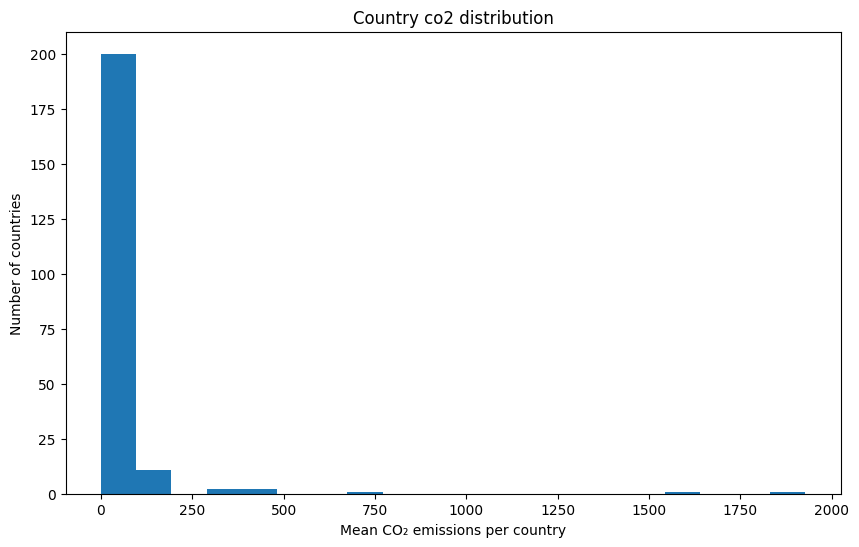

In [ ]:

#fig, axs = plt.subplots(1, 2, sharey=True, tight_layout=True)
country_co2 = df.groupby('country')['co2'].mean()

plt.figure(figsize=(10, 6))
plt.hist(country_co2, bins=20)
plt.xlabel("Mean CO₂ emissions per country")
plt.ylabel("Number of countries")
plt.title("Country co2 distribution")

plt.show()

GDP per Capita vs. CO2 Emissions

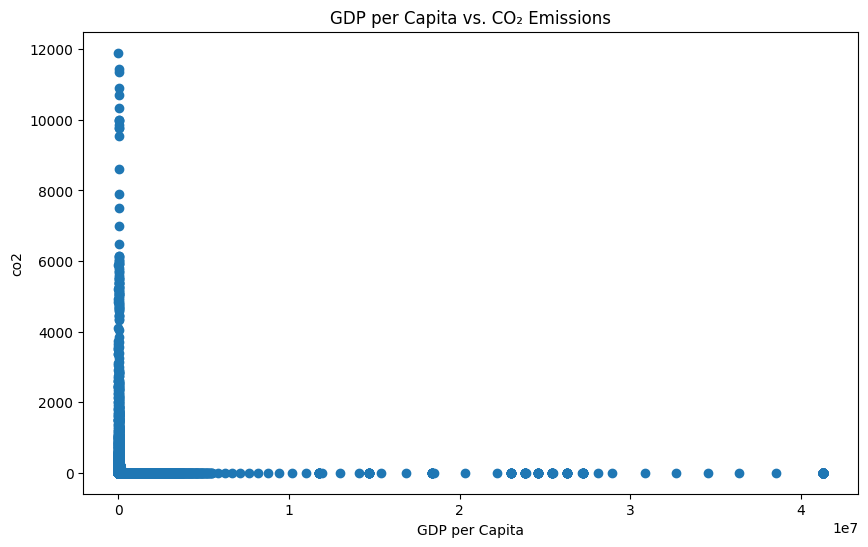

In [ ]:
df['gdp_per_capita'] = df['gdp'] / df['population']

plt.figure(figsize=(10, 6))
plt.scatter(df['gdp_per_capita'], df['co2'])
plt.xlabel('GDP per Capita')
plt.ylabel('co2')
plt.title("GDP per Capita vs. CO₂ Emissions")
plt.show()

# 5. Advanced Visualization with Seaborn

plot showing the number of countries per continent

In [ ]:
import seaborn as sns

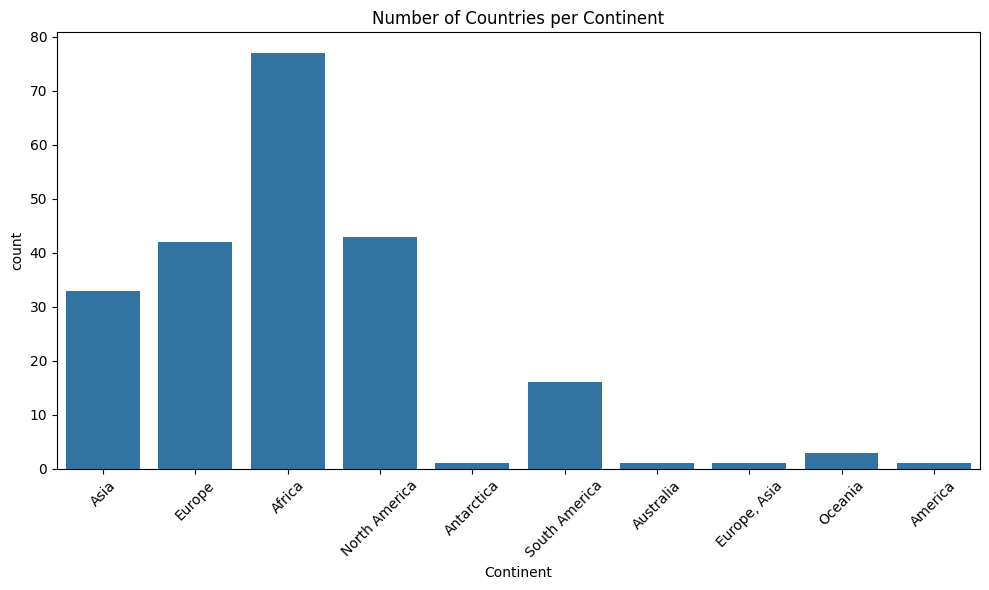

In [ ]:
# Avoid counting countries multiple times because of multiple years
df_unique_countries = df[['country', 'Continent']].drop_duplicates()

plt.figure(figsize=(10,6))
sns.countplot(data=df_unique_countries, x='Continent')
plt.title("Number of Countries per Continent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Box plot showing the distribution of CO₂ emissions by  continent

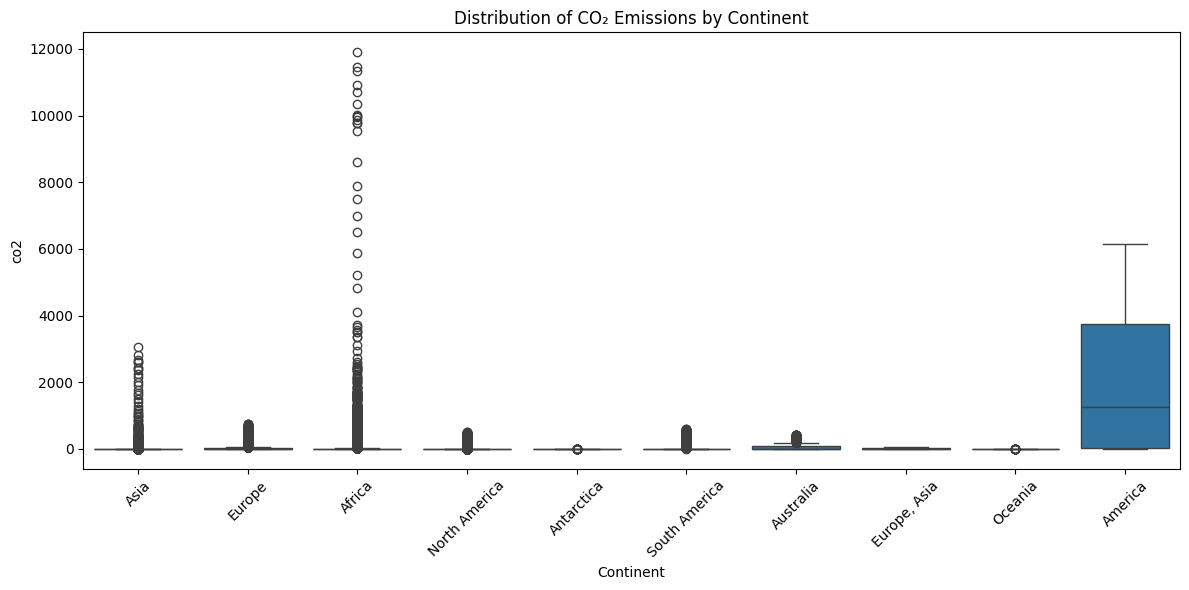

In [ ]:
plt.figure(figsize=(12,6))
sns.boxplot(data=df, x='Continent', y='co2')
plt.title("Distribution of CO₂ Emissions by Continent")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Pair plot of numerical features

In [ ]:

numeric_df = df.select_dtypes(include='number')

sns.pairplot(numeric_df.sample(3000, random_state=42))
plt.show()